<a href="https://colab.research.google.com/github/Shakeel-sj30/Multidisease_prediction_ml/blob/main/MNIST_DIGIT_Classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loading MNIST data from keras dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
# printing the 10 th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

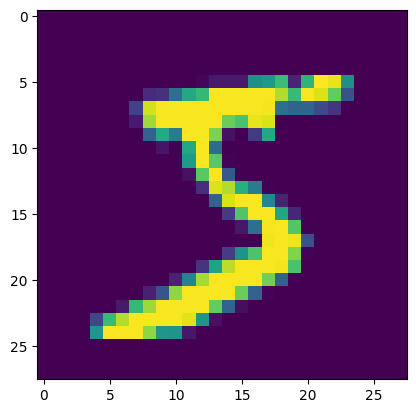

5


In [ ]:
#displaying the image
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [ ]:
#printing unique value of y train
print(np.unique(y_train))
print(np.unique(x_train))

[0 1 2 3 4 5 6 7 8 9]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 

one hot encoding-->[0,1,2]

all the images have the same dimensions in this dataset, if not we have to resize all the images to comman dimensions

In [ ]:
#scaling the value
x_train =x_train/255
x_test = x_test/255# this changes the range from 0 to 255 to 0 to 1


In [ ]:
#Building the Neural Network
# setting up the layers of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),# input layer  , 3 -->rgb
    keras.layers.Dense(50,activation='relu'),# hidden layer
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')# output layer

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compling te neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#training the neural network
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8537 - loss: 0.5072
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9544 - loss: 0.1538
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9665 - loss: 0.1098
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9732 - loss: 0.0864
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9788 - loss: 0.0689
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9819 - loss: 0.0574
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9849 - loss: 0.0481
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9872 - loss: 0.0411
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9885 - loss: 0.0362
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9906 - loss: 0.0294


Accuracy on test data

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9631 - loss: 0.1488
0.9677000045776367


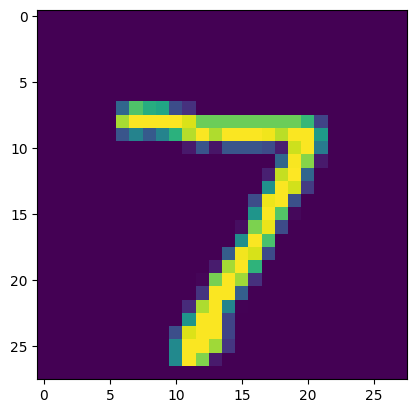

In [ ]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
y_pred= model.predict(x_test)#Returns the model’s predictions for each test example.
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)


model.predict() gives the probability of each class for the data point

In [ ]:
#converting the prediction probability to class label
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)#7 th index have the highest probability so it will return 7

7


In [ ]:
#converting the prediction probability to class label for all test data points
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 963    0    1    1    3    2    2    1    1    6]
 [   0 1115    3    5    0    0    3    1    6    2]
 [   7    1  978   21    5    0    2    7   11    0]
 [   2    0    4  988    2    2    0    4    4    4]
 [   1    0    2    0  971    0    2    3    2    1]
 [   3    0    0   25    1  852    4    1    5    1]
 [   3    1    0    2    9    7  933    0    3    0]
 [   1    1    8    5    3    1    0  994    4   11]
 [   2    0    4   11    5    3    0    3  942    4]
 [   2    2    0    7   43    3    1    6    4  941]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

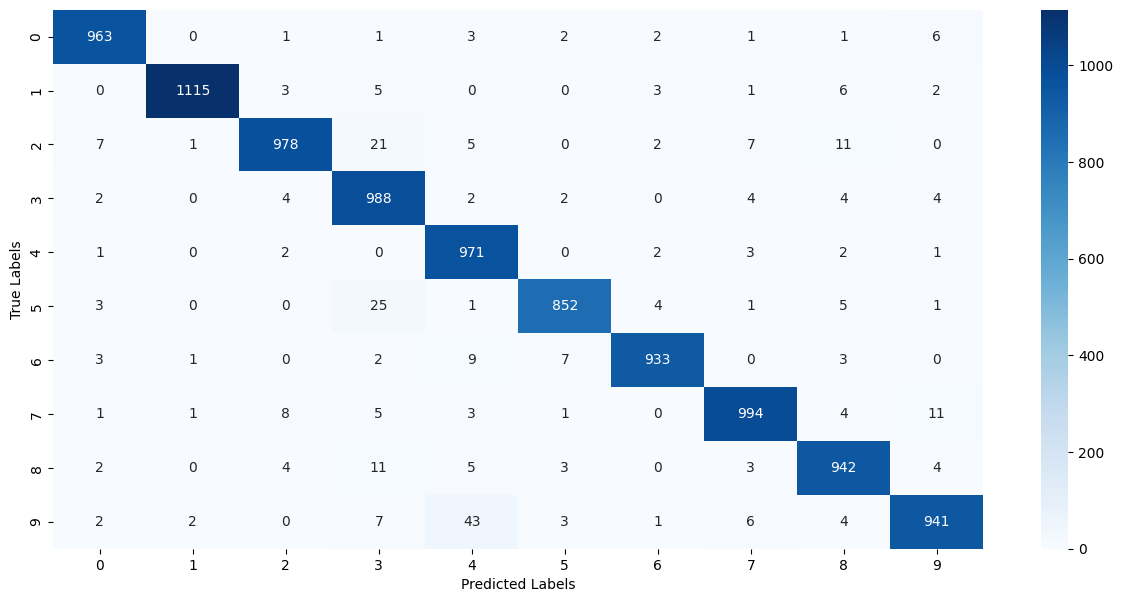

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')#d->int
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')


Building a predictive System

In [ ]:
input_image_path='/content/sample_image.png'
input_image=cv2.imread(input_image_path,cv2.IMREAD_GRAYSCALE)

In [ ]:
cv2_imshow(input_image)

AttributeError: 'NoneType' object has no attribute 'clip'

In [ ]:
input_image_resize=cv2.resize(input_image,(28,28))
cv2_imshow(input_image_resize)

In [ ]:
input_image.shape

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])#1 image,28*28 dimension

In [ ]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

In [ ]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

Predictived System

In [ ]:
input_image_path=input('Enter the path of the image to be predicted:')
input_image=cv2.imread(input_image_path,cv2.IMREAD_GRAYSCALE)
cv2_imshow(input_image)
#grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(input_image,(28,28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print('the handwritten digit is recognised as ',input_pred_label)